In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import file here---->

In [21]:
df=pd.read_csv(r"C:\Users\Vaishnavi\Downloads\archive (3)\myntra_dataset_ByScraping.csv")
df.head()

,brand_name,pants_description,price,MRP,discount_percent,ratings,number_of_ratings
0,WROGN,Men Loose Fit Cotton Jeans,1374.0,2499.0,0.45,4.2,57.0
1,Flying Machine,Men Slim Fit Jeans,1829.0,2999.0,0.39,4.6,5.0
2,Roadster,Men Pure Cotton Jeans,974.0,2499.0,0.61,3.6,1100.0
3,Bene Kleed,Relaxed Fit Denim Jeans,873.0,2299.0,0.62,4.0,4800.0
4,Levis,Men 511 Slim Fit Jeans,1478.0,2899.0,0.49,4.3,264.0


In [22]:
df.shape

(52120, 7)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52120 entries, 0 to 52119
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand_name         52120 non-null  object 
 1   pants_description  52120 non-null  object 
 2   price              52120 non-null  float64
 3   MRP                52120 non-null  float64
 4   discount_percent   52120 non-null  float64
 5   ratings            52120 non-null  float64
 6   number_of_ratings  52120 non-null  float64
dtypes: float64(5), object(2)
memory usage: 2.8+ MB


In [24]:
df.describe(include='all')

,brand_name,pants_description,price,MRP,discount_percent,ratings,number_of_ratings
count,52120,52120,52120.000000,52120.000000,52120.000000,52120.000000,52120.000000
unique,417,2680,NaN,NaN,NaN,NaN,NaN
top,WROGN,Men Slim Fit Jeans,NaN,NaN,NaN,NaN,NaN
freq,5303,7850,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1594.515445,3180.398438,1.648256,3.997794,91.568937
std,NaN,NaN,1495.972325,2201.883218,4.687529,0.420404,433.918513
min,NaN,NaN,337.000000,499.000000,0.020000,1.000000,5.000000
25%,NaN,NaN,989.000000,2499.000000,0.400000,3.800000,16.000000
50%,NaN,NaN,1439.000000,2999.000000,0.500000,4.000000,35.000000
75%,NaN,NaN,1829.000000,3499.000000,0.630000,4.200000,74.000000


In [25]:
df.columns = [c.strip().lower().replace(' ', '_') for c in df.columns]
df.rename(columns={'pants_description':'product_description'}, inplace=True)

In [26]:
df.isnull().sum()

brand_name             0
product_description    0
price                  0
mrp                    0
discount_percent       0
ratings                0
number_of_ratings      0
dtype: int64

In [28]:
df.duplicated().sum()

17047

In [29]:
df = df.drop_duplicates(keep="first")

In [30]:
df.shape

(35073, 7)

# It converts the  columns to correct numeric types

In [31]:
for col in ['price', 'mrp', 'discount_percent', 'ratings', 'number_of_ratings']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [32]:
df[['price', 'mrp', 'discount_percent', 'ratings', 'number_of_ratings']].isna().sum()


price                0
mrp                  0
discount_percent     0
ratings              0
number_of_ratings    0
dtype: int64

# it fixes the wrong discount scale

In [33]:
df['discount_percent'] = np.where(df['discount_percent'] <= 1, 
                                  df['discount_percent'] * 100, 
                                  df['discount_percent'])

In [35]:
df.head()

,brand_name,product_description,price,mrp,discount_percent,ratings,number_of_ratings
0,WROGN,Men Loose Fit Cotton Jeans,1374.0,2499.0,45.0,4.2,57.0
1,Flying Machine,Men Slim Fit Jeans,1829.0,2999.0,39.0,4.6,5.0
2,Roadster,Men Pure Cotton Jeans,974.0,2499.0,61.0,3.6,1100.0
3,Bene Kleed,Relaxed Fit Denim Jeans,873.0,2299.0,62.0,4.0,4800.0
4,Levis,Men 511 Slim Fit Jeans,1478.0,2899.0,49.0,4.3,264.0


# Creating new columns for:
 #1)to calculate actual discount % from price and MRP
 #2)to create “price band” categories

In [36]:
df['calculated_discount'] = ((df['mrp'] - df['price']) / df['mrp']) * 100

In [38]:
bins = [0, 999, 1999, 3999, 99999]
labels = ['Budget (<999)', 'Mid (1000–1999)', 'Premium (2000–3999)', 'Luxury (4000+)']
df['price_band'] = pd.cut(df['price'], bins=bins, labels=labels)

In [39]:
df.head()

,brand_name,product_description,price,mrp,discount_percent,ratings,number_of_ratings,calculated_discount,price_band
0,WROGN,Men Loose Fit Cotton Jeans,1374.0,2499.0,45.0,4.2,57.0,45.018007,Mid (1000–1999)
1,Flying Machine,Men Slim Fit Jeans,1829.0,2999.0,39.0,4.6,5.0,39.013004,Mid (1000–1999)
2,Roadster,Men Pure Cotton Jeans,974.0,2499.0,61.0,3.6,1100.0,61.024410,Budget (<999)
3,Bene Kleed,Relaxed Fit Denim Jeans,873.0,2299.0,62.0,4.0,4800.0,62.026968,Budget (<999)
4,Levis,Men 511 Slim Fit Jeans,1478.0,2899.0,49.0,4.3,264.0,49.016902,Mid (1000–1999)


# Univariate Analysis

In [ ]:
#price distribution

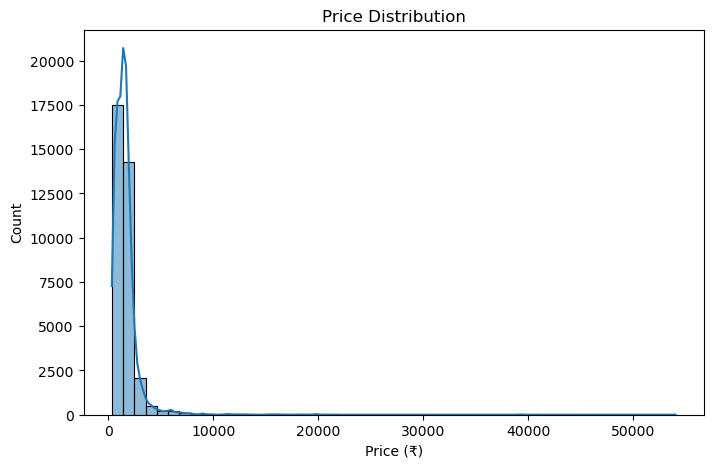

In [41]:
plt.figure(figsize=(8,5))
sns.histplot(df['price'], bins=50, kde=True)
plt.title("Price Distribution")
plt.xlabel("Price (₹)")
plt.show()

In [ ]:
#discount distribtion

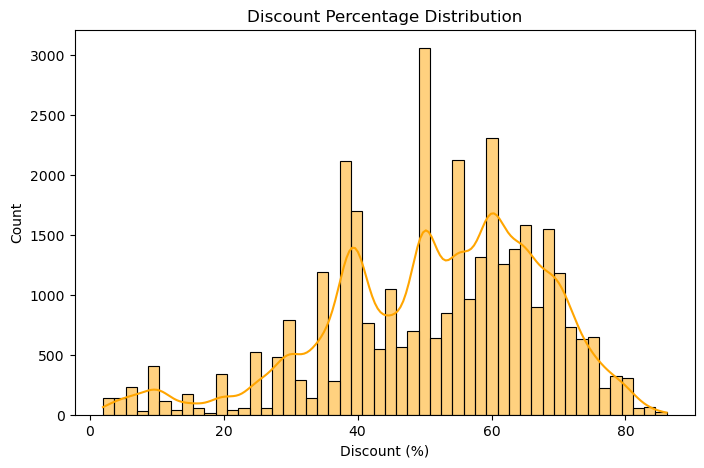

In [45]:
plt.figure(figsize=(8,5))
sns.histplot(df['calculated_discount'], bins=50, color="orange", kde=True)
plt.title("Discount Percentage Distribution")
plt.xlabel("Discount (%)")
plt.show()

In [ ]:
#rating distribution

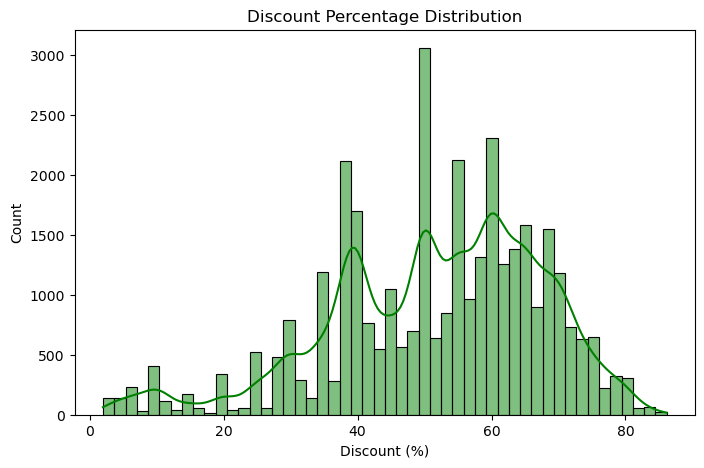

In [47]:
plt.figure(figsize=(8,5))
sns.histplot(df['calculated_discount'], bins=50, color="green", kde=True)
plt.title("Discount Percentage Distribution")
plt.xlabel("Discount (%)")
plt.show()

# now giving answers to businnes problem statement


# Top 10 Brands by Number of Products

C:\Users\Vaishnavi\AppData\Local\Temp\ipykernel_1568\78666210.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_brands.values, y=top_brands.index, palette='coolwarm')


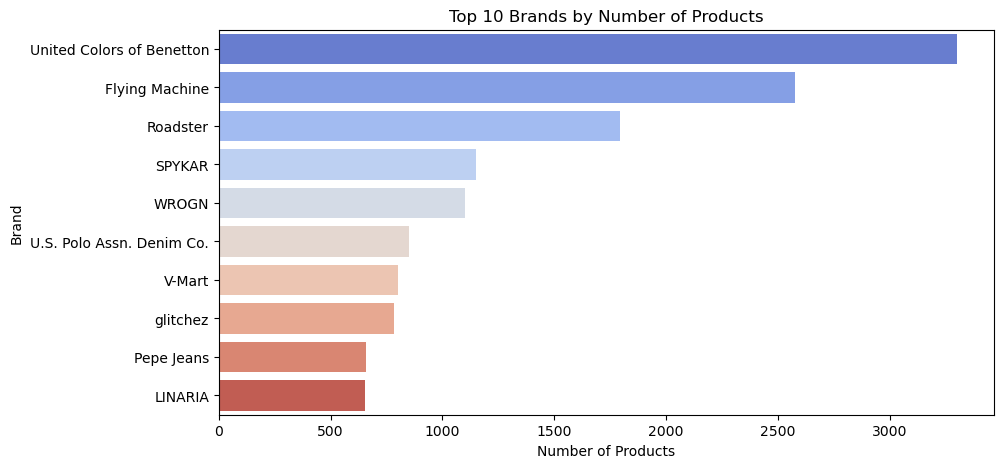

In [49]:
top_brands = df['brand_name'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_brands.values, y=top_brands.index, palette='coolwarm')
plt.title("Top 10 Brands by Number of Products")
plt.xlabel("Number of Products")
plt.ylabel("Brand")
plt.show()

# Average Price & Discount per Brand

In [50]:
brand_summary = df.groupby('brand_name').agg({
    'price': 'mean',
    'calculated_discount': 'mean',
    'ratings': 'mean',
    'number_of_ratings': 'sum'
}).sort_values('price', ascending=False).head(10)

brand_summary

,price,calculated_discount,ratings,number_of_ratings
brand_name,,,,
Jacob Cohen,33142.500000,33.087961,4.075000,512.0
Tramarossa,23143.315789,32.951147,4.289474,705.0
Karl Lagerfeld,18487.500000,32.500000,4.450000,79.0
Just Cavalli,18149.000000,45.001364,4.600000,5.0
Versace Jeans Couture,17210.125000,34.504132,4.012500,490.0
7 For All Mankind,16000.500000,45.836445,4.200000,512.0
HACKETT LONDON,14220.500000,29.669861,4.100000,302.0
Polo Ralph Lauren,11656.444444,28.114927,3.977778,559.0
True Religion,11165.918919,40.508193,4.085586,6594.0


# relationship between price and discount

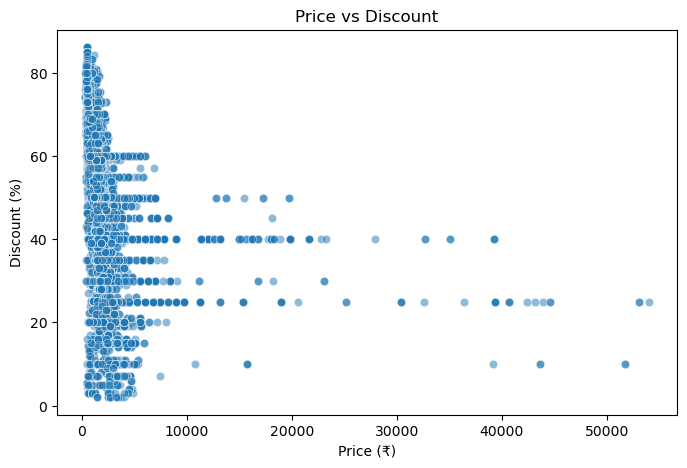

In [52]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='price', y='calculated_discount', data=df, alpha=0.5)
plt.title("Price vs Discount")
plt.xlabel("Price (₹)")
plt.ylabel("Discount (%)")
plt.show()

# Ratings vs Price Brand

C:\Users\Vaishnavi\AppData\Local\Temp\ipykernel_1568\2338809627.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='price_band', y='ratings', data=df, palette='Set2')


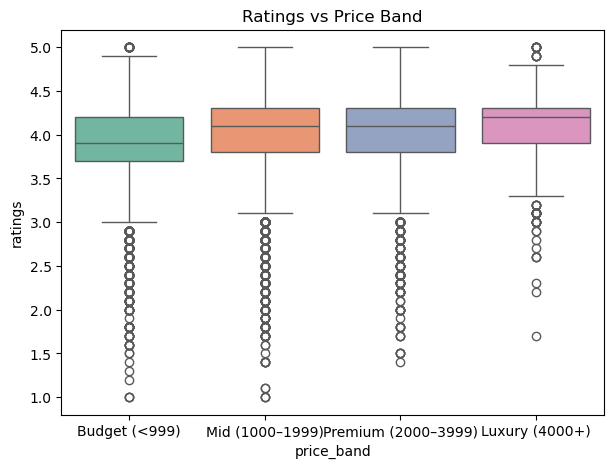

In [53]:
plt.figure(figsize=(7,5))
sns.boxplot(x='price_band', y='ratings', data=df, palette='Set2')
plt.title("Ratings vs Price Band")
plt.show()

# Correlation Between Variables

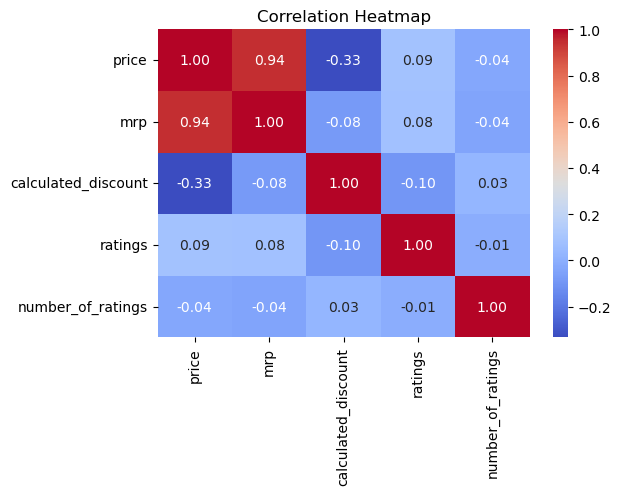

In [54]:
corr = df[['price','mrp','calculated_discount','ratings','number_of_ratings']].corr()
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

# Most Popular Products

In [55]:
popular = df.sort_values('number_of_ratings', ascending=False).head(10)
popular[['brand_name','product_description','price','ratings','number_of_ratings']]

,brand_name,product_description,price,ratings,number_of_ratings
39519,Roadster,Men Slim Fit Jeans,579.0,3.5,30700.0
39520,United Colors of Benetton,Men Mid-Rise Regular Fit Jeans,579.0,3.5,30700.0
28991,Roadster,Men Skinny Fit Jeans,479.0,3.9,22600.0
36,Urbano Fashion,Men Slim Fit Jeans,629.0,4.0,22300.0
28887,Roadster,Men Skinny Fit Jeans,874.0,3.9,19600.0
11073,HIGHLANDER,Men Slim Fit Jeans,584.0,3.9,18200.0
28395,HIGHLANDER,Men Slim Fit Jeans,623.0,4.0,16900.0
3414,Roadster,Men Skinny Fit Jeans,696.0,3.7,14700.0
32602,HIGHLANDER,Men Slim Fit Jeans,519.0,3.8,14400.0
11552,HIGHLANDER,Men Tapered Fit Jeans,493.0,3.6,14100.0
